In [1]:
import os
import numpy as np
import rasterio
import xarray as xr
#import hvplot.xarray
#import holoviews as hv

#from rasterio.session import AWSSession
from rasterio.plot import *

#hv.extension('bokeh')

In [2]:
cog_url = 's3://naip-analytic/az/2017/60cm/rgbir/31111/m_3111139_ne_12_h_20170610.mrf'

#aws = AWSSession(region_name='us-west-2', requester_pays=True)

# set environment variables to access aws '--request-payer' buckets
os.environ['AWS_REQUEST_PAYER'] = 'requester'
os.environ['AWS_DEFAULT_REGION'] = 'us-west-2'

### Time without any cog settings

In [3]:
%%timeit pass
with rasterio.open(cog_url, driver='MRF') as cog:
    nir1 = cog.read((4,2,3))

7.94 s ± 388 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
with rasterio.open(cog_url, driver='MRF') as cog:
    nir1 = cog.read((4,2,3))

In [5]:
%%time 
    
show(nir1)

<Figure size 640x480 with 1 Axes>

CPU times: user 4.67 s, sys: 168 ms, total: 4.84 s
Wall time: 4.14 s


### Time with basic cog settings

In [6]:
# set environment variables for cloud-optimized format
#os.environ['CPL_VSIL_CURL_ALLOWED_EXTENSIONS'] = 'TIF'
os.environ['VSI_CACHE'] = 'True'
os.environ['GDAL_DISABLE_READDIR_ON_OPEN'] = 'EMPTY_DIR'

In [7]:
%%timeit pass
with rasterio.open(cog_url, driver='MRF') as cog:
    nir = cog.read((4,2,3))

7.92 s ± 531 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
with rasterio.open(cog_url, driver='MRF') as cog:
    nir2 = cog.read((4,2,3))

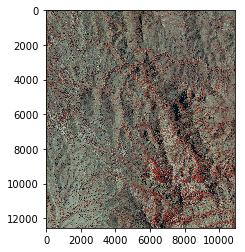

CPU times: user 5.99 s, sys: 340 ms, total: 6.33 s
Wall time: 5.63 s


In [9]:
%%time 
    
show(nir2)